# 1. Importing Libraries and Data

Importing the relevant libraries and the cleaned dataset.

In [1]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from IPython.display import display
from IPython.display import Image
from sklearn.externals.six import StringIO 
from subprocess import call

import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import StackingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from pickle import dump

from Classes import Classification
from Classes import Ensemble

pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

/Users/ravimalde/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/data_cleaned.csv')

The class distribution is checked to ensure that there is a balanced number of winners on both the fighter_x and fighter_y sides. This is already approximately a 50/50 split.

In [3]:
df.fx_win.value_counts(normalize=True)

1    0.500762
0    0.499238
Name: fx_win, dtype: float64

In [4]:
df.head()

,name_x,height_x,weight_x,reach_x,fx_win,age_x,height_x.1,weight_x.1,reach_x.1,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,age_y,height_y.1,weight_y.1,reach_y.1,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y,stance_x_Open Stance,stance_x_Orthodox,stance_x_Sideways,stance_x_Southpaw,stance_x_Switch,stance_y_Open Stance,stance_y_Orthodox,stance_y_Sideways,stance_y_Southpaw,stance_y_Switch
0,Aaron Phillips,1.75,135.0,1.78,0,25.05,1.75,135.0,1.78,7.27,0.80,6.33,0.74,0.00,0.00,0.62,1.00,0.89,Matt Hobar,1.78,135.0,1.78,27.63,1.78,135.0,1.78,2.52,0.26,9.71,0.59,0.00,0.0,1.0,0.00,0.80,0,0,0,1,0,0,0,0,1,0
1,Aaron Riley,1.73,155.0,1.75,0,25.10,1.73,155.0,1.75,6.20,0.55,5.80,0.49,0.00,0.00,0.75,1.00,0.72,Spencer Fisher,1.70,155.0,1.78,29.69,1.70,155.0,1.78,2.26,0.48,8.64,0.62,1.54,0.5,1.0,4.63,0.85,0,0,0,1,0,0,0,0,1,0
2,Aaron Riley,1.73,155.0,1.75,1,27.93,1.73,155.0,1.75,5.50,0.54,5.85,0.48,1.50,0.29,0.75,0.75,0.70,Jorge Gurgel,1.70,155.0,1.75,31.81,1.70,155.0,1.75,5.80,0.50,5.80,0.50,1.00,0.5,0.5,0.00,0.64,0,0,0,1,0,0,1,0,0,0
3,Aaron Riley,1.73,155.0,1.75,1,28.66,1.73,155.0,1.75,6.91,0.52,5.96,0.45,1.26,0.38,0.58,0.42,0.69,Shane Nelson,1.75,155.0,1.78,24.69,1.75,155.0,1.78,6.85,0.42,6.85,0.42,0.00,0.0,0.0,0.00,0.78,0,0,0,1,0,0,0,0,1,0
4,Aaron Riley,1.73,155.0,1.75,1,29.47,1.73,155.0,1.75,7.68,0.53,6.10,0.50,1.11,0.38,0.11,0.00,0.68,Joe Brammer,1.73,155.0,1.73,26.77,1.73,155.0,1.73,1.39,0.24,4.17,0.58,0.00,0.0,1.0,0.00,0.70,0,0,0,1,0,0,1,0,0,0


# 2. Data Transformations

In this section the data is transformed using the StandardScaler class. The scaling was fit to fighter_x and then used to transform the fighter_y data.

In [5]:
y = df[['fx_win']]

In [6]:
X = df.drop(columns=['fx_win','name_x','name_y'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, random_state=50, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50, stratify=y_train)

In [8]:
x_num_cols = [col for col in X.columns if '_x' in col and 'stance' not in col]
y_num_cols = [col for col in X.columns if '_y' in col and 'stance' not in col]

In [9]:
scaler = RobustScaler()

In [10]:
X_train[x_num_cols] = scaler.fit_transform(X_train[x_num_cols])
X_train[y_num_cols] = scaler.transform(X_train[y_num_cols])

X_val[x_num_cols] = scaler.transform(X_val[x_num_cols])
X_val[y_num_cols] = scaler.transform(X_val[y_num_cols])

X_test[x_num_cols] = scaler.transform(X_test[x_num_cols])
X_test[y_num_cols] = scaler.transform(X_test[y_num_cols])

The scaler was then saved to be used on the data in the web application.

In [11]:
dump(scaler, open('scaler.pkl', 'wb'))

# 3. Modelling

A stratified kfold with 5 splits was used for the cross validation of the models.

In [12]:
skf = StratifiedKFold(n_splits=5, random_state=50)

## 3.1. Logistic Regression (Baseline Model)

The first model tried was a logistic regression. This acts as a baseline for which other models will be compared to. The metric by which models will be assessed is the area under the ROC curve.

In [13]:
log_reg1 = Classification("Logistic Regression", X_train, X_val, y_train, y_val)

A grid search is completed which returns the best performing hyperparameters for the model.

,Model,Train AUC,Validation AUC
0,Logistic Regression,0.660849,0.657958


The best hyperparameters are:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} 



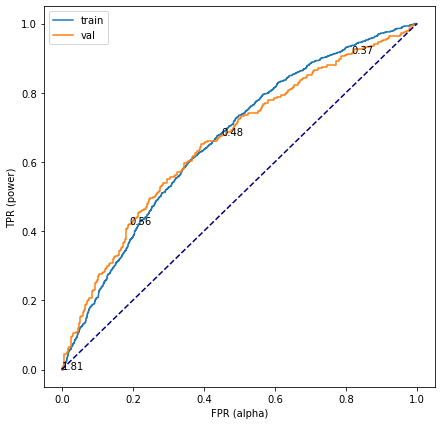

In [14]:
param_grid = {'C': [0.01,0.1,1,10,100],
             'penalty': ['l1','l2'],
             'solver': ['liblinear','saga']}
log_reg1.get_scores(param_grid, skf)

## 3.2. Support Vector Machine

In [15]:
svm1 = Classification("SVM", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,SVM,0.8125,0.692503


The best hyperparameters are:  {'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale'} 



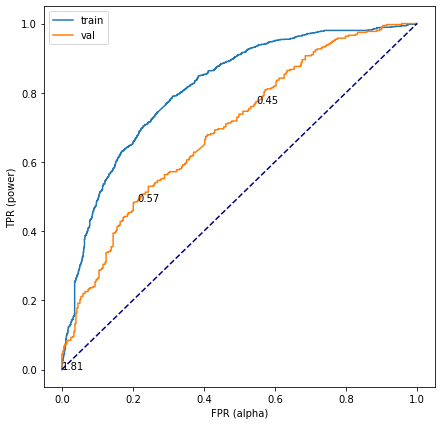

In [16]:
param_grid = {'C':[1,2,3,4,5,6],
             'degree':[1,2,3,4,5,6],
             'gamma':['scale','auto'],
             'decision_function_shape':['ovo','ovr']}
svm1.get_scores(param_grid, skf)

## 3.3. Decision Tree

In [17]:
d_tree1 = Classification('Decision Tree', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.828566,0.605191


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 10} 



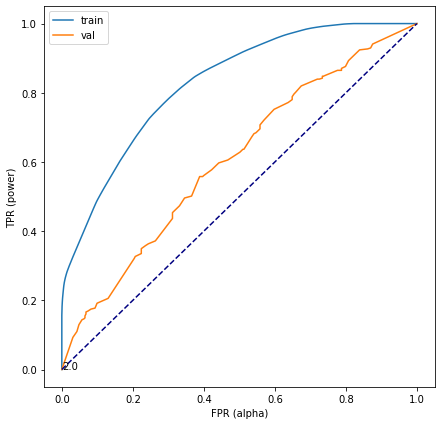

In [18]:
param_grid = {'max_depth':[1,10,100,1000],'min_samples_leaf':[1,10,100,1000]}
d_tree1.get_scores(param_grid, skf)

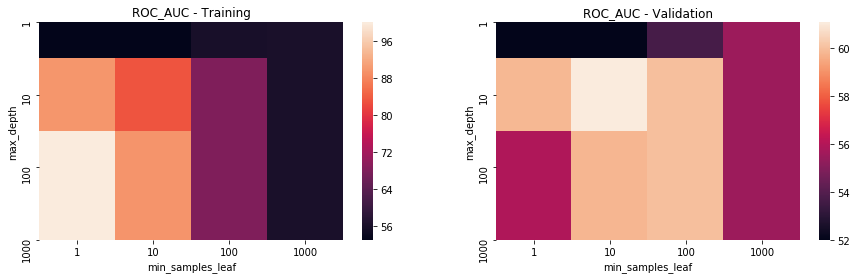

In [19]:
d_tree1.opt_plots()

In [20]:
d_tree2 = Classification('Decision Tree', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.765262,0.618669


The best hyperparameters are:  {'max_depth': 8, 'min_samples_leaf': 18} 



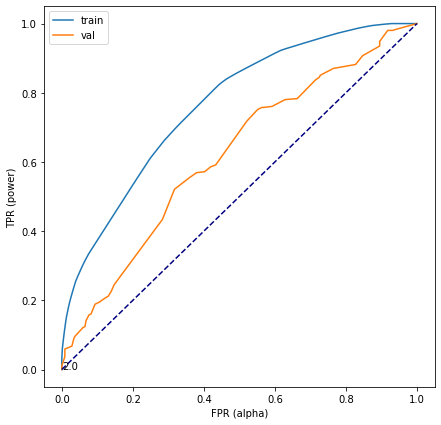

In [21]:
param_grid = {'max_depth':range(1,20,1),'min_samples_leaf':range(1,30,1)}
d_tree2.get_scores(param_grid, skf)

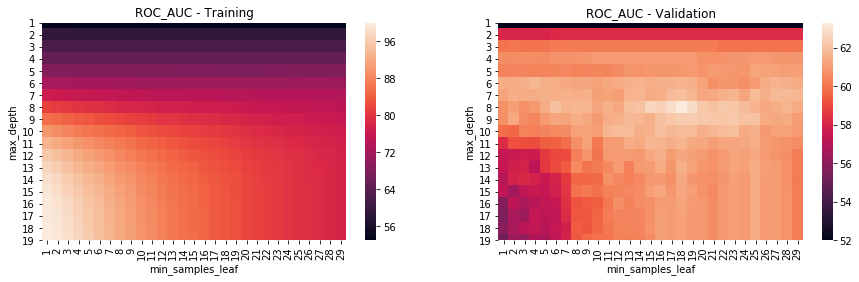

In [22]:
d_tree2.opt_plots()

## 3.4. Random Forest

In [23]:
rand_forr1 = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,0.993514,0.709731


The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 1} 



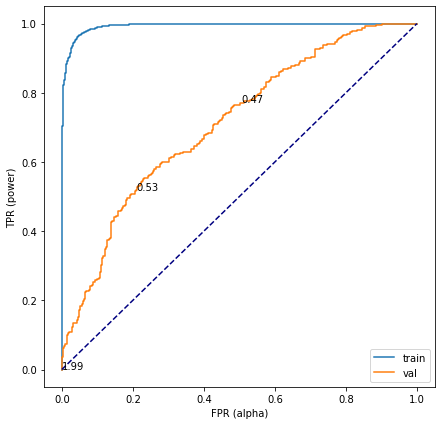

In [24]:
param_grid = {'max_depth':[1,10,100,1000],'min_samples_leaf':[1,10,100,1000]}
rand_forr1.get_scores(param_grid, skf)

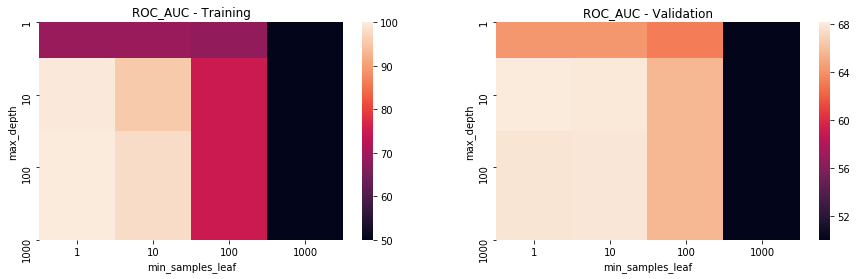

In [25]:
rand_forr1.opt_plots()

In [78]:
rand_forr2 = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,0.991977,0.705031


The best hyperparameters are:  {'max_depth': 11, 'min_samples_leaf': 4} 



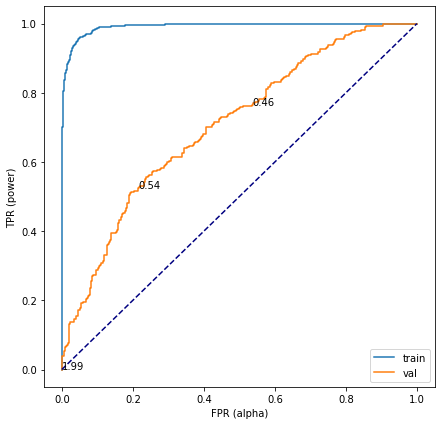

In [79]:
param_grid = {'max_depth':range(1,31,1),'min_samples_leaf':range(1,10,1)}
rand_forr2.get_scores(param_grid, skf)

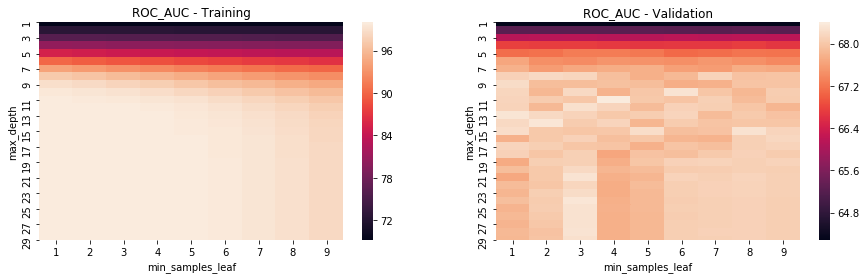

In [80]:
rand_forr2.opt_plots()

Strangely, the AUC on the validation set actually drops slightly. The cause of this was investigated heavily but to no avail. It is currently thought that this issue is due to floating point errors or a multiprocessing issue. However, the drop in performance is very slight and could be considered negligible, therefore this model is chosen as the best performer.

## 3.5. Voting Classifier

In [29]:
svm = ('svm', svm1.best_model)
rand_forr = ('rand_forr', rand_forr2.best_model)
estimators = [svm, rand_forr]
voting = Ensemble("Voting", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Voting,0.933463,0.705295


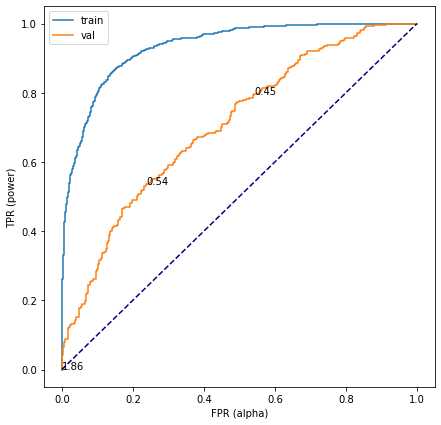

In [30]:
voting.ensemble_get_scores({}, skf)

## 3.6. Adaboost

In [31]:
estimators = rand_forr2.best_model
adaboost = Ensemble("AdaBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,AdaBoost,1.0,0.668563


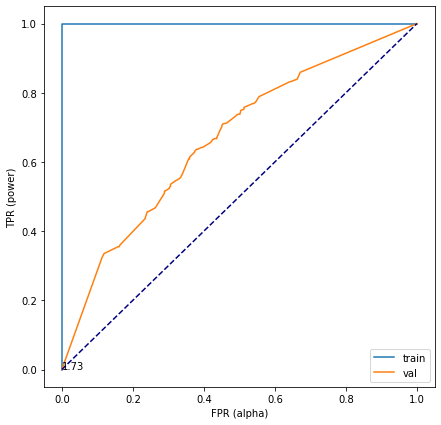

In [32]:
adaboost.ensemble_get_scores({}, skf)

## 3.7. XGBoost

In [33]:
estimators = []
xgboost = Ensemble("XGBoost", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,XGBoost,0.842878,0.69591


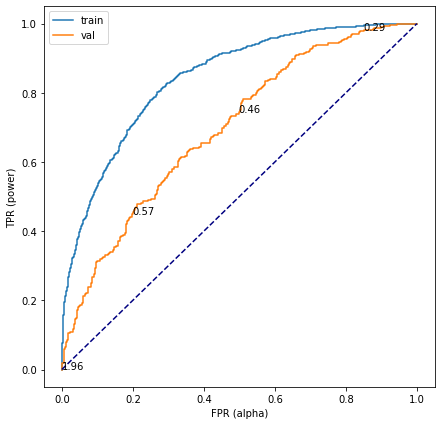

In [34]:
xgboost.ensemble_get_scores({}, skf)

## 3.8. Stacking Classifier

In [35]:
estimators = [('log_reg', log_reg1.best_model),
              ('svm', svm1.best_model), 
              ('rnd', rand_forr2.best_model),
              ('dtree', d_tree2.best_model),
              ('adaboost', adaboost.best_model),
              ('xgboost', xgboost.best_model),
              ('voting', voting.best_model)]
stacking1 = Ensemble("Stacking", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Stacking,0.959288,0.709652


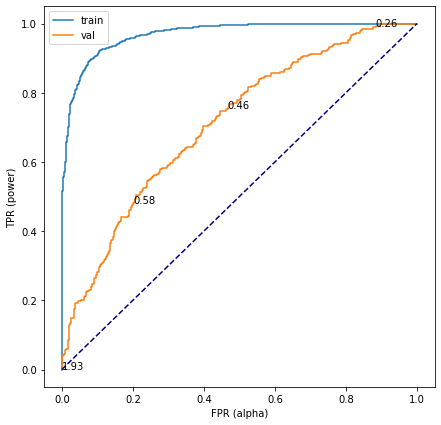

In [36]:
stacking1.ensemble_get_scores({}, skf)

In [37]:
estimators = [('svm', svm1.best_model), 
              ('rnd', rand_forr2.best_model),
              ('voting', voting.best_model)]
stacking2 = Ensemble("Stacking", estimators, X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Stacking,0.980982,0.70713


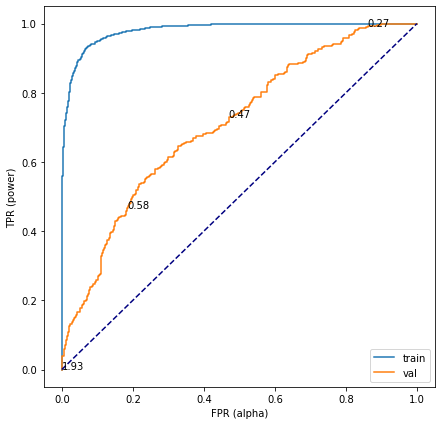

In [38]:
stacking2.ensemble_get_scores({}, skf)

In [82]:
stacking1.best_model.score(X_val, y_val)

0.6440677966101694

In [83]:
stacking2.best_model.score(X_val, y_val)

0.6596045197740112

The validation AUC ROC was very close for the two stacking configurations, so their accuracy on the validation dataset was tested and the second configuration performed better, therefore the second stacking model was chosen as the best performer.

## 3.9. Deep Neural Network

In [39]:
l2_reg = keras.regularizers.l2(0.0001)

In [40]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer='normal', 
                 kernel_regularizer=l2_reg))
model1.add(Dropout(rate=0.1))
model1.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=l2_reg))
model1.add(Dropout(rate=0.1))
model1.add(Dense(1, activation='sigmoid'))

In [41]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2752      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [42]:
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [43]:
history = model1.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/20
2828/2828 [==============================] - 1s 494us/step - loss: 0.6787 - accuracy: 0.5771 - val_loss: 0.6576 - val_accuracy: 0.6243
Epoch 2/20
2828/2828 [==============================] - 0s 143us/step - loss: 0.6543 - accuracy: 0.6082 - val_loss: 0.6505 - val_accuracy: 0.6271
Epoch 3/20
2828/2828 [==============================] - 0s 142us/step - loss: 0.6417 - accuracy: 0.6315 - val_loss: 0.6555 - val_accuracy: 0.6130
Epoch 4/20
2828/2828 [==============================] - 0s 143us/step - loss: 0.6350 - accuracy: 0.6308 - val_loss: 0.6554 - val_accuracy: 0.6017
Epoch 5/20
2828/2828 [==============================] - 0s 142us/step - loss: 0.6274 - accuracy: 0.6482 - val_loss: 0.6608 - val_accuracy: 0.6144
Epoch 6/20
2828/2828 [==============================] - 0s 142us/step - loss: 0.6210 - accuracy: 0.6517 - val_loss: 0.6621 - val_accuracy: 0.5989
Epoch 7/20
2828/2828 [==============================] - 0s 141us/step - loss:

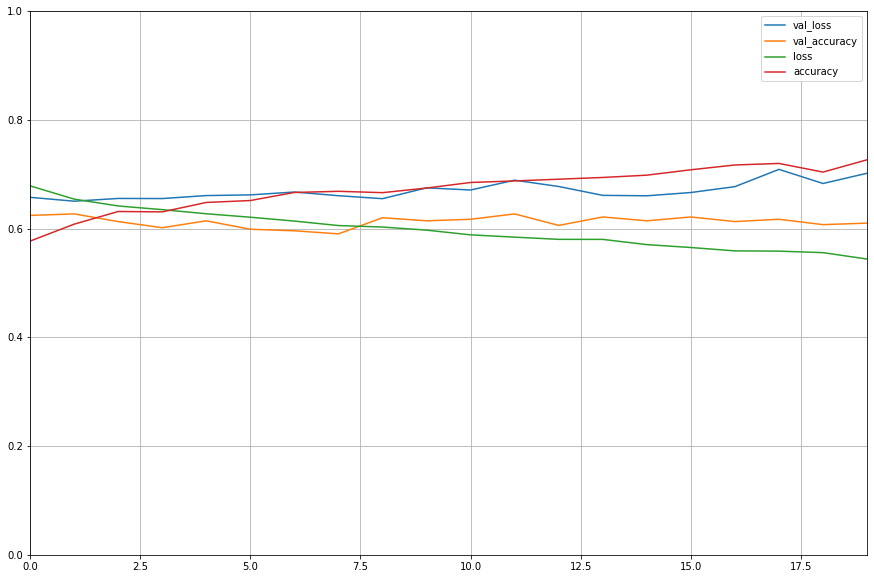

In [44]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
nn_val_accuracy = model1.evaluate(X_val, y_val)[1]

708/708 [==============================] - 0s 39us/step


# 4. Model Evaluation

In this section the models are compared based on their performance metrics and the best model is chosen for the application.

In [46]:
model_roc_auc_list = [log_reg1.scores_table,
                         svm1.scores_table, 
                         d_tree2.scores_table, 
                         rand_forr2.scores_table,
                         voting.scores_table,
                         adaboost.scores_table,
                         xgboost.scores_table,
                         stacking2.scores_table]

In [47]:
df_evaluation = pd.concat(model_roc_auc_list)

In [48]:
model_val_score = [log_reg1.best_model.score(X_val, y_val),
                    svm1.best_model.score(X_val, y_val),
                    d_tree2.best_model.score(X_val, y_val), 
                    rand_forr2.best_model.score(X_val, y_val),
                    voting.best_model.score(X_val, y_val),
                    adaboost.best_model.score(X_val, y_val),
                    xgboost.best_model.score(X_val, y_val),
                    stacking2.best_model.score(X_val, y_val)]

In [49]:
df_evaluation['Validation Accuracy'] = model_val_score

In [50]:
df_nn = {'Model':'Deep Neural Network','Train AUC':'Unknown','Validation AUC':'Unknown','Validation Accuracy':nn_val_accuracy}

In [51]:
df_evaluation = df_evaluation.append(df_nn, ignore_index=True)

In [52]:
df_evaluation.sort_values(by='Validation Accuracy', ascending=False, inplace=True)
df_evaluation.reset_index(drop=True, inplace=True)

In [53]:
df_evaluation

,Model,Train AUC,Validation AUC,Validation Accuracy
0,Stacking,0.980982,0.70713,0.659605
1,Voting,0.933463,0.705295,0.642655
2,Random Forest,0.991977,0.705031,0.641243
3,SVM,0.8125,0.692503,0.629944
4,AdaBoost,1,0.668563,0.628531
5,XGBoost,0.842878,0.69591,0.628531
6,Logistic Regression,0.660849,0.657958,0.622881
7,Deep Neural Network,Unknown,Unknown,0.610169
8,Decision Tree,0.765262,0.618669,0.598870


Stacking performed the best on the validation dataset, achieving an accuracy of 0.66. This is therefore the chosen model for the application. The decision was made to not alter the threshold of the model because there is no incentive to prioritise either true positives, true negatives, false positives or false negatives.

In [55]:
dump(stacking2.best_model, open('model.pkl', 'wb'))

In [57]:
stacking2.best_model.score(X_test, y_test)

0.64

# 5. Feature Importance

This section looks to identify what features are most important in the model and is born more from curiosity than to serve and function in the web application. The SVM, voting and stacking classifiers do not have a feature importance function, so the random forest model was used and it is assumed its feature importances are similar to that of the overall stacking model.

In [58]:
df_importance = pd.DataFrame()

In [59]:
df_importance['Feature'] = X_train.columns

In [60]:
df_importance['Importance'] = rand_forr2.best_model.feature_importances_

In [61]:
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

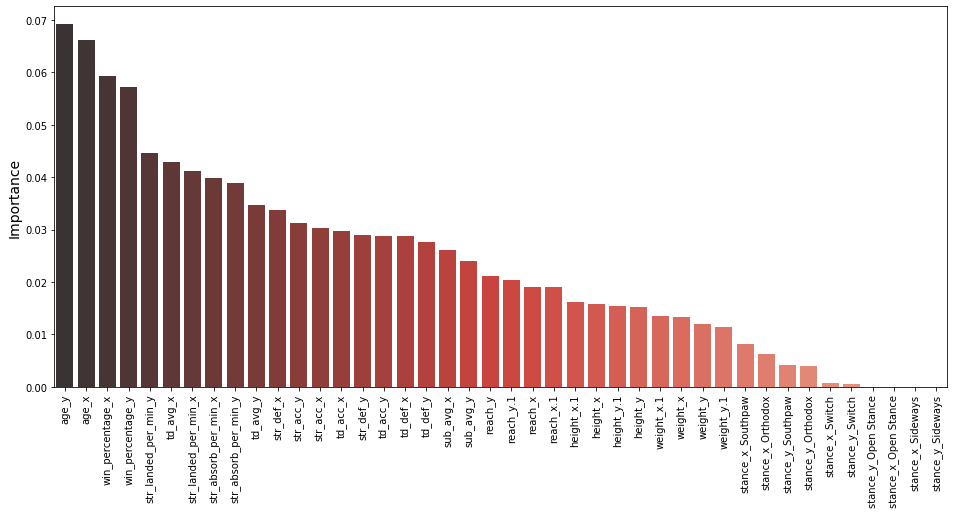

In [62]:
plt.figure(figsize=(16,7))
sns.barplot(x='Feature', y='Importance', data=df_importance, palette="Reds_d")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel('Importance', fontsize=14)
plt.show()

It appears age, win percentage, strikes landed per minute, takedown average and strikes absorbed per minute are the 5 most important features in the model.